#### B4. Create a program that fits a mixture of Gaussians to a dataset of handwritten digit features and clusters them into distinct groups. Use the Expectation Maximization method to estimate the parameters of the Gaussian mixture model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

In [3]:
pca = PCA(n_components=50, random_state=42)
X_reduced = pca.fit_transform(X)

In [4]:
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
gmm.fit(X_reduced)

GaussianMixture(n_components=10, random_state=42)

In [9]:
clusters = gmm.predict(X_reduced)

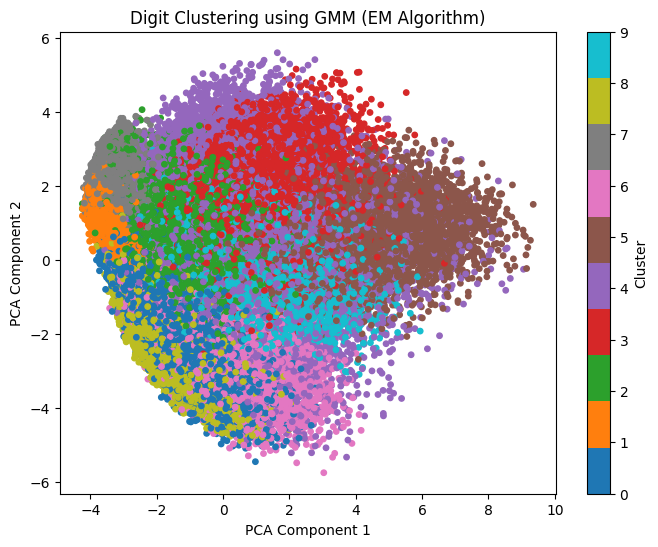

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='tab10', s=15)
plt.title("Digit Clustering using GMM (EM Algorithm)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [11]:
def cluster_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    accuracy = cm[row_ind, col_ind].sum() / y_true.size
    return accuracy

acc = cluster_accuracy(y, clusters)
print(f"GMM Clustering Accuracy: {acc:.4f}")

GMM Clustering Accuracy: 0.6080


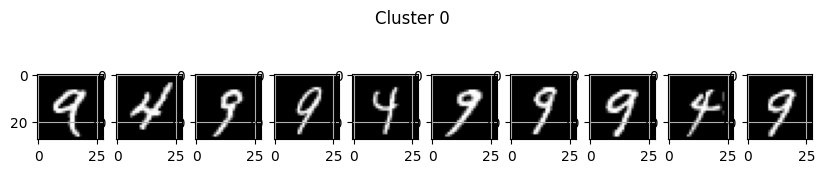

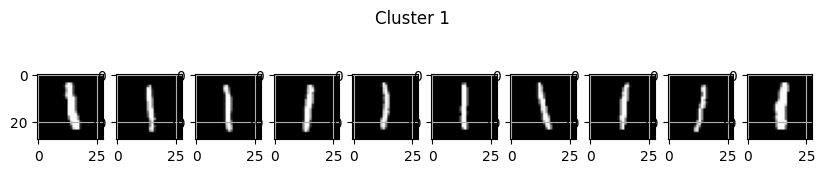

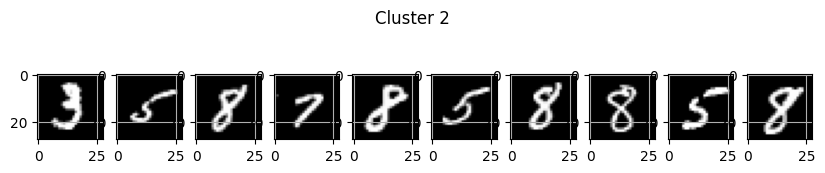

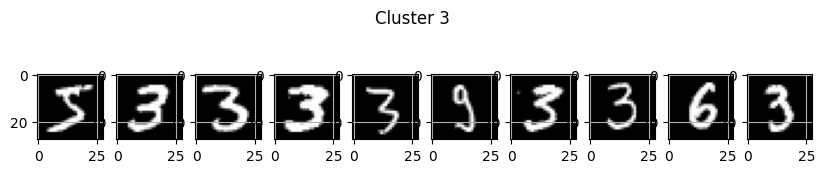

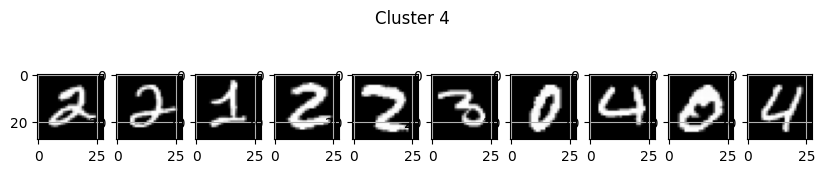

In [ ]:
#OPTIONAL
def plot_cluster_images(cluster_number, num_samples=10):
    indices = np.where(clusters == cluster_number)[0][:num_samples]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.grid("off")
    plt.suptitle(f"Cluster {cluster_number}")
    plt.show()

for i in range(5):
    plot_cluster_images(i)